In [1]:
import pandas as pd

df = pd.read_csv("Data/reviews.csv", encoding = 'ISO-8859-1')
df.head()

,Text,Sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       50000 non-null  object
 1   Sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [3]:
df.groupby('Sentiment').describe()

Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          25000  24697  I see that C. Thomas Howell has appeared in ma...   
1          25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
Sentiment       
0            3  
1            5

Có tương đối nhiều hàng trùng lập => Xóa đi

In [4]:
df.drop_duplicates(inplace=True)
df.groupby('Sentiment').describe()

Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          24697  24697  This is one of the dumbest films, I've ever se...   
1          24884  24884  Working-class romantic drama from director Mar...   

                
          freq  
Sentiment       
0            1  
1            1

Vector hóa bàng CountVectorizer

Sử dụng thêm tham số ngram_range để chọn số lượng từ liên tiếp.
`ngram_range(1,2)` tức là mô hình sẽ trích xuất cả từ đơn ( 1 từ riêng lẻ ) và từ kép ( 2 từ liên tiếp )

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', min_df=20, ngram_range=(1,2))

x = vectorizer.fit_transform(df['Text'])

y =df['Sentiment']

Tiến hành chia tập dữ liệu với tỉ lệ 50/50

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

Sử dụng mô hình hồi quy phi tuyến là hồi quy logistic

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

Xác thực mô hình thông qua ma trận nhầm lẫn

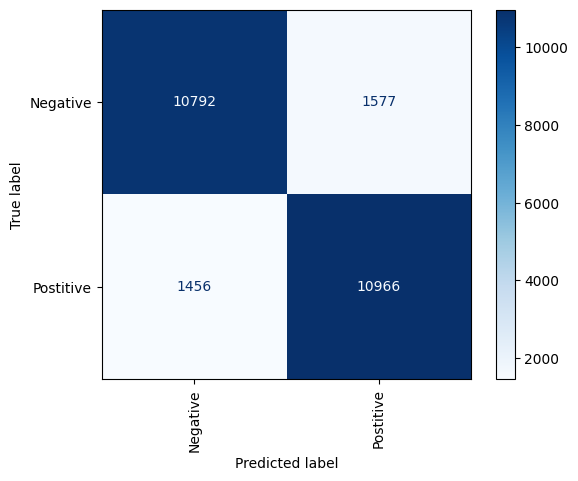

In [9]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model, x_test, y_test, display_labels=['Negative', 'Postitive'],
                   cmap = "Blues", xticks_rotation='vertical')

Tức là trong mô hình đã xác định đúng 10.795 đánh giá tiêu cực trong khi phân loại sai 1.574 trong số đó. Nó đã xác định đúng 10.966 đánh giá tích cực và sai 1.456 lần

---
Áp dụng để dự đoán thử cảm xúc của một bình luận

In [10]:
text = 'The long lines and poor customer service really turned me off'
model.predict_proba(vectorizer.transform([text]))[0][1]

np.float64(0.09147294292903158)

Nhận xét: 9% bình luận này là tích cực. 91% bình luận này là tiêu cực.

In [11]:
text = 'The food was great and the service was excellent!'
model.predict_proba(vectorizer.transform([text]))[0][1]

np.float64(0.8579339078952901)

Nhận xét: 85% bình luận này là tích cực, 15% là tiêu cực.

---
Thử bỏ stop_words ra thử xem mô hình có cải thiện hay không?

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=20, ngram_range=(1,2))

x = vectorizer.fit_transform(df['Text'])

y =df['Sentiment']

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

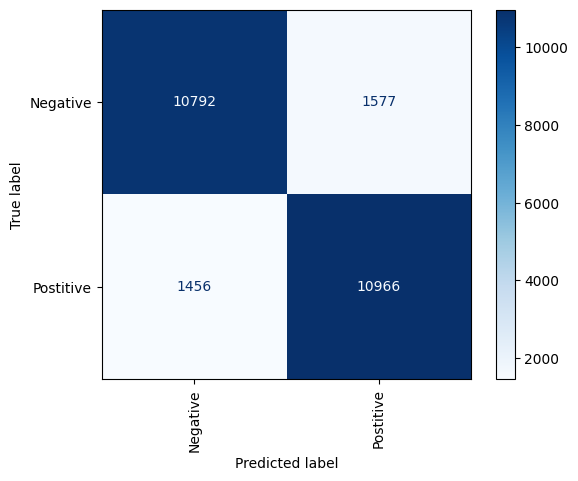

In [14]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model, x_test, y_test, display_labels=['Negative', 'Postitive'],
                   cmap = "Blues", xticks_rotation='vertical')

In [15]:
text = 'The long lines and poor customer service really turned me off'
model.predict_proba(vectorizer.transform([text]))[0][1]

ValueError: X has 74938 features, but LogisticRegression is expecting 33752 features as input.